#  load dataset 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

from sklearn import metrics

warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(7.5,3.8)})
data = pd.read_csv("diabetic_data.csv")

In [2]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
data.shape

(101766, 50)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# preprocessing dataset

In [5]:
data.replace("?",np.nan,inplace = True)
(data.isna().sum()/len(data)*100).sort_values(ascending=False).head(10)

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
encounter_id          0.000000
tolazamide            0.000000
glyburide             0.000000
dtype: float64

In [6]:
data = data.drop('weight',1)
data = data.drop('payer_code', 1)
data = data.drop('medical_specialty',1)
(data.isna().sum()/len(data)*100).sort_values(ascending=False).head(10)

race             2.233555
diag_3           1.398306
diag_2           0.351787
diag_1           0.020636
encounter_id     0.000000
tolazamide       0.000000
glyburide        0.000000
tolbutamide      0.000000
pioglitazone     0.000000
rosiglitazone    0.000000
dtype: float64

In [7]:
print(data['race'].value_counts())

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [8]:
data['race'] = data['race'].fillna('Caucasian')

In [9]:
data['diag_1'] = data['diag_1'].fillna('Unknown')
data['diag_2'] = data['diag_2'].fillna('Unknown')
data['diag_3'] = data['diag_3'].fillna('Unknown')

In [10]:
data.isna().sum().sort_values(ascending = False).head()

encounter_id     0
tolazamide       0
acetohexamide    0
glipizide        0
glyburide        0
dtype: int64

In [11]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [12]:
obj_col = data.columns[data.dtypes==object]
print(obj_col,'\n','total number of categorical columns:',len(obj_col))

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object') 
 total number of categorical columns: 34


In [13]:
num_col = data.columns[data.dtypes==np.int64]
print(num_col,'\n','total number of numerical columns:',len(num_col))

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object') 
 total number of numerical columns: 13


In [14]:
data['admission_type_id'] = data['admission_type_id'].astype('object')
data['discharge_disposition_id'] = data['discharge_disposition_id'].astype('object')
data['admission_source_id'] = data['admission_source_id'].astype('object')

In [15]:
data = data.drop('encounter_id',1)
data = data.drop('patient_nbr',1)

# Train test split

In [16]:
data1 = data.copy()

In [17]:
from sklearn.model_selection import train_test_split
train_index, test_index = train_test_split(np.array(data1.index),
                                           train_size=0.5,random_state=41)

In [18]:
train = data1.loc[train_index,:]
test = data1.loc[test_index,:]

In [19]:
y_train = train['readmitted']
y_test = test['readmitted']

In [20]:
train.drop('readmitted',axis = 1,inplace = True)
test.drop('readmitted',axis = 1,inplace = True)

In [21]:
train.shape, test.shape

((50883, 44), (50883, 44))

In [22]:
X_train_1 = train.copy()
y_train_1 = y_train.copy()

In [23]:
X_test_1 = test.copy()
y_test_1 = y_test.copy()

# Initial data analysis

<AxesSubplot:xlabel='readmitted', ylabel='count'>

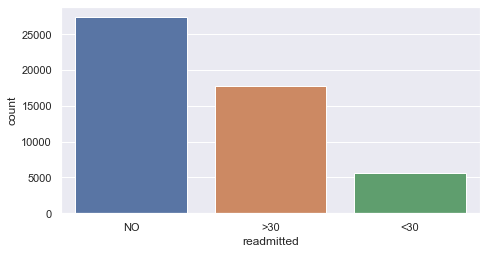

In [24]:
# response
sns.countplot(y_train)

In [25]:
# replace "NO" and "<30" with 0, ">30" with 1
maps={"NO":1,"<30":0,">30":1}
y_train_1 = y_train_1.map(maps)
y_test_1 = y_test_1.map(maps)

[Text(0.5, 1.0, 'after reclassify')]

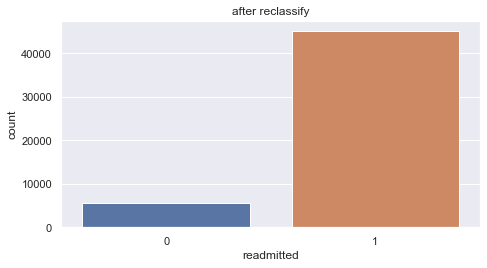

In [26]:
sns.countplot(y_train_1).set(title = 'after reclassify')

### Handling class imbalance

In [27]:
obj_col = X_train_1.columns[X_train_1.dtypes==object]
print(obj_col,'\n','total number of categorical columns:',len(obj_col))

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'],
      dtype='object') 
 total number of categorical columns: 36


In [28]:
cat_index = list()
for i in obj_col:
    index = X_train_1.columns.get_loc(i)
    cat_index.append(index)
    

In [29]:
len(cat_index)

36

In [30]:
from imblearn.over_sampling import SMOTENC
smnc = SMOTENC(categorical_features=cat_index, random_state=41,sampling_strategy = 0.6)

SMOTE_X, SMOTE_y = smnc.fit_resample(X_train_1, y_train_1)

# Explortary data analysis

In [31]:
SMOTE_y.value_counts()

1    45229
0    27137
Name: readmitted, dtype: int64

<AxesSubplot:xlabel='readmitted', ylabel='count'>

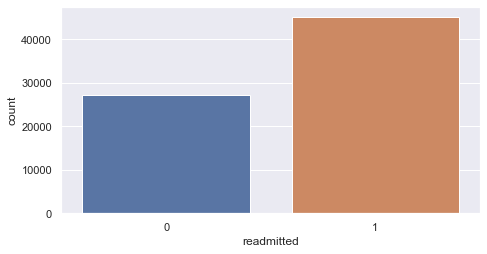

In [32]:
# response
sns.countplot(SMOTE_y)

In [33]:
# categorical data - countplot

# fig,ax = plt.subplots(12,3,figsize=(20,80),dpi=100)
# for i in range(1,37):
#     plt.subplot(12,3,i)
#     sns.countplot(x = SMOTE_X[obj_col[i-1]])

In [34]:
num_col = data.columns[data.dtypes==np.int64]
print(num_col,'\n','total number of numerical columns:',len(num_col))

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object') 
 total number of numerical columns: 8


In [35]:
# numerical data - distribution

# fig,ax = plt.subplots(3,3,figsize=(20,20),dpi=100)
# for i in range(1,9):
#     plt.subplot(3,3,i)
#     sns.distplot(SMOTE_X[num_col[i-1]])

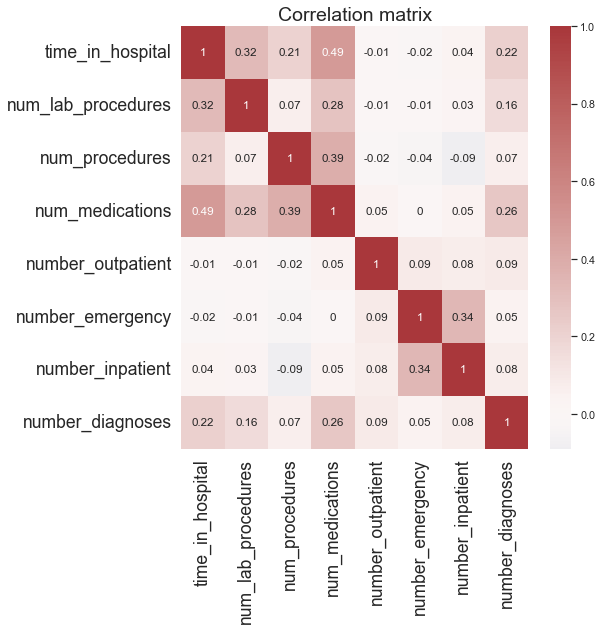

In [36]:
# heat map btw numerical data
plt.figure(figsize=(8,8),dpi = 70)
sns.heatmap(SMOTE_X[num_col].corr().round(2),
            xticklabels=num_col,
            yticklabels=num_col,
            cmap='vlag',center=0,annot=True)
plt.title('Correlation matrix',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18,rotation=360)
plt.show()

sns.pairplot(SMOTE_X[num_col])
plt.show()

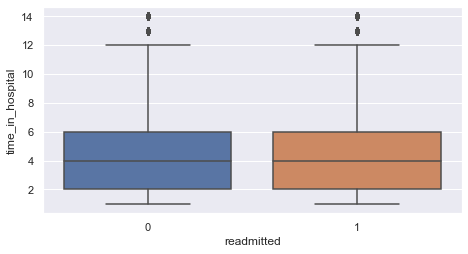

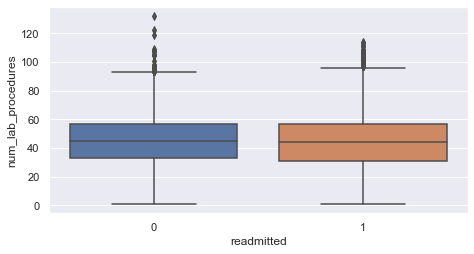

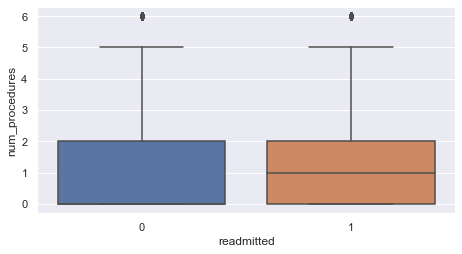

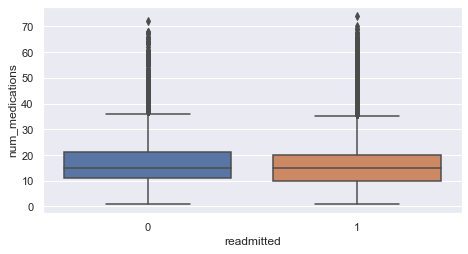

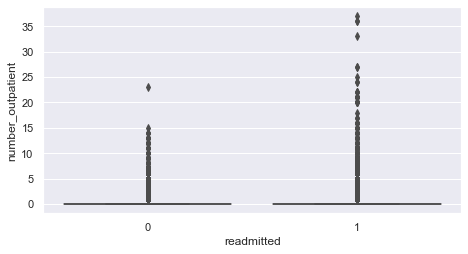

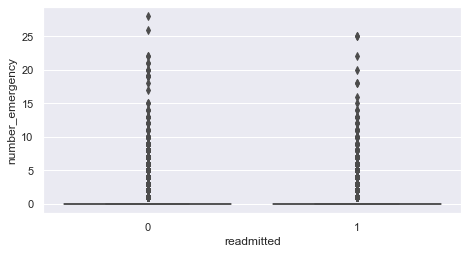

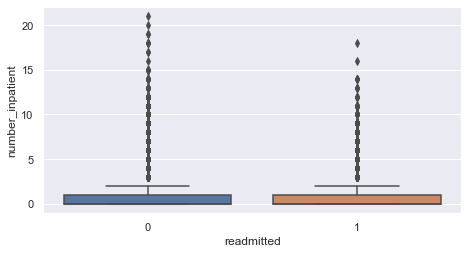

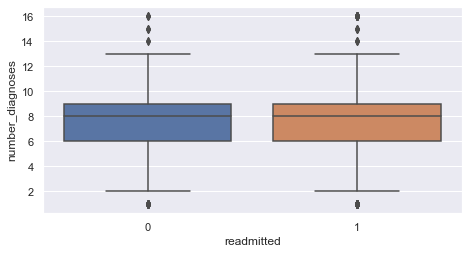

In [37]:
for i in num_col:
    sns.boxplot(x=SMOTE_y, y=SMOTE_X[i])
    plt.show()

In [38]:
# fig,ax = plt.subplots(3,3,figsize=(20,20),dpi=100)
# for i in range(1,9):
#     plt.subplot(3,3,i)
#     sns.distplot(SMOTE_X[num_col[i-1]][SMOTE_y==0],label = 'readmitted = 0')
#     sns.distplot(SMOTE_X[num_col[i-1]][SMOTE_y==1],label = 'readmitted = 1')
#     plt.legend()

In [39]:
# kruskall wallies test for distribution
from scipy import stats

greater = SMOTE_X[SMOTE_y==0]
less = SMOTE_X[SMOTE_y==1]

p_values=[]
stat = []
reject = []
for i in num_col:
    kw = stats.kruskal(greater[i],less[i])
    p_value = kw.pvalue.round(4)
    p_values.append(p_value)
    statistic = kw.statistic.round(4)
    stat.append(statistic)
    if p_value<0.01:
        reject.append('Yes')

In [40]:
pd.DataFrame([stat,p_values,reject],columns = num_col,index = ['statistic','p_value','reject H0?'])

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
statistic,58.9629,28.1192,644.7884,193.3707,141.1134,0.7673,809.5842,17.5775
p_value,0.0,0.0,0.0,0.0,0.0,0.3811,0.0,0.0000
reject H0?,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN


fig,ax = plt.subplots(12,3,figsize=(20,80),dpi=100)
for i in range(1,37):
    plt.subplot(12,3,i)
    sns.countplot(x = SMOTE_X[obj_col[i-1]], hue = SMOTE_y)
    plt.title(obj_col[i-1])
    plt.legend()

# Feature engineering

In [41]:
SMOTE_X.shape,X_test_1.shape

((72366, 44), (50883, 44))

In [42]:
# concat train_test before feature engineering
train_test = pd.concat([SMOTE_X, X_test_1], axis=0)

#### Transformation on categorical variables

In [43]:
def diag_code(data1, cols):
    for col in cols:
        data1.loc[(data1[col].str.contains("V")) | (data1[col].str.contains("E")), col] = 1000
        data1.loc[(data1[col]=='Unknown'), col] = 0
        data1[col] = data1[col].astype(np.float16)

    for col in cols:
        data1["diag"] = np.nan
        data1.loc[(data1[col]>=390) & (data1[col]<=459) | (data1[col]==785), "diag"] = "Circulatory"
        data1.loc[(data1[col]>=460) & (data1[col]<=519) | (data1[col]==786), "diag"] = "Respiratory"
        data1.loc[(data1[col]>=520) & (data1[col]<=579) | (data1[col]==787), "diag"] = "Digestive"
        data1.loc[(data1[col]>=250) & (data1[col]<251), "diag"] = "Diabetes"
        data1.loc[(data1[col]>=800) & (data1[col]<=999), "diag"] = "Injury"
        data1.loc[(data1[col]>=710) & (data1[col]<=739), "diag"] = "Muscoloskeletal"
        data1.loc[(data1[col]>=580) & (data1[col]<=629) | (data1[col] == 788), "diag"] = "Genitourinary"
        data1.loc[(data1[col]>=140) & (data1[col]<=239), "diag"] = "Neoplasms"
        

        data1["diag"] = data1["diag"].fillna("Other")
        data1[col] = data1["diag"]
        data1 = data1.drop("diag", axis=1)

    return data1

In [44]:
train_test = diag_code(train_test,["diag_1","diag_2","diag_3"])

In [45]:
train_test['diag_1'].value_counts()

Circulatory        38423
Other              21640
Respiratory        17148
Digestive          11282
Diabetes           10411
Injury              8382
Genitourinary       6123
Muscoloskeletal     5841
Neoplasms           3999
Name: diag_1, dtype: int64

In [46]:
train_test['diag_2'].value_counts()

Circulatory        39376
Other              32675
Diabetes           15047
Respiratory        12953
Genitourinary      10360
Digestive           4899
Neoplasms           3093
Injury              2863
Muscoloskeletal     1983
Name: diag_2, dtype: int64

In [47]:
train_test['diag_3'].value_counts()

Circulatory        36992
Other              36165
Diabetes           21009
Respiratory         9132
Genitourinary       8611
Digestive           4633
Injury              2334
Muscoloskeletal     2187
Neoplasms           2186
Name: diag_3, dtype: int64

In [48]:
train_test.admission_type_id.value_counts()

1    69778
3    21667
2    20478
5     5508
6     5462
8      325
7       21
4       10
Name: admission_type_id, dtype: int64

In [49]:
train_test['admission_type_id'].replace(1,'Emergency',inplace = True)
train_test['admission_type_id'].replace(2,'Urgent',inplace = True)
train_test['admission_type_id'].replace(3,'Elective',inplace = True)
train_test['admission_type_id'].replace(4,'Newborn',inplace = True)
train_test['admission_type_id'].replace(5,'Not Available',inplace = True)
train_test['admission_type_id'].replace(6,'NULL',inplace = True)
train_test['admission_type_id'].replace(7,'Trauma Center',inplace = True)
train_test['admission_type_id'].replace(8,'Not Mapped',inplace = True)

In [50]:
train_test.admission_type_id.value_counts()

Emergency        69778
Elective         21667
Urgent           20478
Not Available     5508
NULL              5462
Not Mapped         325
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

In [51]:
# reference: https://www.hcup-us.ahrq.gov/db/vars/siddistnote.jsp?var=asource
# (17,20 - since no resources identifies code 17 and 20, they are considered as 'other')
train_test['admission_source_id'].replace(1, 'Referral', inplace=True)
train_test['admission_source_id'].replace(2, 'Referral', inplace=True)
train_test['admission_source_id'].replace(3, 'Referral', inplace=True)
train_test['admission_source_id'].replace(4, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(5, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(6, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(7, 'Emergency room', inplace=True)
train_test['admission_source_id'].replace(8, 'Court/Law enforcement', inplace=True)
train_test['admission_source_id'].replace(9, 'Unknown', inplace=True)
train_test['admission_source_id'].replace(10, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(11, 'delivery', inplace=True)
train_test['admission_source_id'].replace(13, 'delivery', inplace=True)
train_test['admission_source_id'].replace(14, 'delivery', inplace=True)
train_test['admission_source_id'].replace(17, 'Unknown', inplace=True)
train_test['admission_source_id'].replace(20, 'Unknown', inplace=True)
train_test['admission_source_id'].replace(22, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(25, 'Transfer', inplace=True)

In [52]:
train_test['admission_source_id'].value_counts()

Emergency room           73517
Referral                 35293
Unknown                   7928
Transfer                  6490
Court/Law enforcement       16
delivery                     5
Name: admission_source_id, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Emergency room'),
  Text(1, 0, 'Referral'),
  Text(2, 0, 'Transfer'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'Court/Law enforcement'),
  Text(5, 0, 'delivery')])

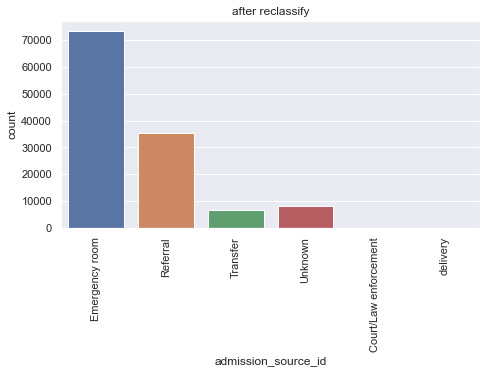

In [53]:
sns.countplot('admission_source_id', data=train_test).set(title = 'after reclassify')
plt.xticks(rotation=90)

In [54]:
# 17-19 no resouces for code 17-19. replaced by unknown
# reference: https://www.hcup-us.ahrq.gov/db/vars/siddistnote.jsp?var=dispuniform
train_test['discharge_disposition_id'].replace(1, 'Routine', inplace = True)
train_test['discharge_disposition_id'].replace(2, 'Transfer_stHospital', inplace = True)
train_test['discharge_disposition_id'].replace(3, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(4, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(5, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(6, 'HHC', inplace = True)
train_test['discharge_disposition_id'].replace(7, 'AMA', inplace = True)
train_test['discharge_disposition_id'].replace(8, 'HHC', inplace = True)
train_test['discharge_disposition_id'].replace(9, 'Transfer_stHospital', inplace = True)
train_test['discharge_disposition_id'].replace(10, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(11, 'Expired', inplace = True)
train_test['discharge_disposition_id'].replace(12, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(13, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(14, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(15, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(16, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(17, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(18, 'NULL', inplace = True)
train_test['discharge_disposition_id'].replace(19, 'Expired', inplace = True)
train_test['discharge_disposition_id'].replace(20, 'Expired', inplace = True)
train_test['discharge_disposition_id'].replace(22, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(23, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(24, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(25, 'Not mapped', inplace = True)
train_test['discharge_disposition_id'].replace(27, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(28, 'Transfer_Other', inplace = True)

In [55]:
train_test['discharge_disposition_id'].value_counts()

Routine                74429
Transfer_Other         24149
HHC                    15134
NULL                    3985
Transfer_stHospital     2244
Expired                 1652
Not mapped              1021
AMA                      635
Name: discharge_disposition_id, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Routine'),
  Text(1, 0, 'Not mapped'),
  Text(2, 0, 'HHC'),
  Text(3, 0, 'Transfer_Other'),
  Text(4, 0, 'NULL'),
  Text(5, 0, 'Transfer_stHospital'),
  Text(6, 0, 'Expired'),
  Text(7, 0, 'AMA')])

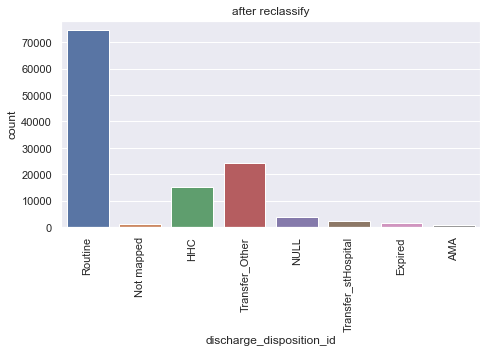

In [56]:
sns.countplot('discharge_disposition_id', data=train_test).set(title = 'after reclassify')
plt.xticks(rotation=90)

In [57]:
obj_col

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'],
      dtype='object')

In [58]:
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
               'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
               'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
               'miglitol', 'troglitazone', 'tolazamide', 'examide', 
               'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
               'metformin-rosiglitazone', 'metformin-pioglitazone', 'citoglipton']

In [59]:
def use_or_not(data, col):
    maps = {'No': 0, 'Up': 1, 'Steady': 1, 'Down': 1}
    data['use_or_not'+col] = data[col].map(maps)

In [60]:
for i in medications:
    use_or_not(train_test,i)

In [61]:
medications_use_ornot=['use_or_not' + i for i in medications]

In [62]:
## new variable: the number of doses the patient take 
train_test ['number_24medications'] = np.zeros(train_test.shape[0])
for i in medications_use_ornot:
    train_test ['number_24medications'] = train_test['number_24medications'] + train_test[i]

In [63]:
for i in medications_use_ornot:
    del train_test[i]

In [64]:
def change_or_not(data,col):
    maps = {'No': 0, 'Up': 1, 'Steady': 0, 'Down': 1}
    data['change_or_not'+col] = data[col].map(maps)

In [65]:
for i in medications:
    change_or_not(train_test,i)

In [66]:
medications_change_or_not=['change_or_not' + i for i in medications]

In [67]:
## new variable: the number of changes of doses the patient take 
train_test ['number_change_24medications'] = np.zeros(train_test.shape[0])
for i in medications_change_or_not:
    train_test ['number_change_24medications'] = train_test['number_change_24medications'] + train_test[i]

In [68]:
for i in medications_change_or_not:
    del train_test[i]

In [69]:
for i in medications:
    del train_test[i]

In [70]:
num_col = train_test.columns[train_test.dtypes!=object]
print(num_col,'\n','total number of numerical columns:',len(num_col))

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'number_24medications',
       'number_change_24medications'],
      dtype='object') 
 total number of numerical columns: 10


In [71]:
obj_col = train_test.columns[train_test.dtypes==object]
print(obj_col,'\n','total number of categorical columns:',len(obj_col))

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed'],
      dtype='object') 
 total number of categorical columns: 13


In [72]:
for i in obj_col:
    display(train_test[i].value_counts())

Caucasian          98383
AfricanAmerican    20661
Hispanic            2058
Other               1506
Asian                641
Name: race, dtype: int64

Female             67077
Male               56169
Unknown/Invalid        3
Name: gender, dtype: int64

[70-80)     33441
[60-70)     27629
[80-90)     21656
[50-60)     19814
[40-50)     10954
[30-40)      4026
[90-100)     2965
[20-30)      1873
[10-20)       730
[0-10)        161
Name: age, dtype: int64

Emergency        69778
Elective         21667
Urgent           20478
Not Available     5508
NULL              5462
Not Mapped         325
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

Routine                74429
Transfer_Other         24149
HHC                    15134
NULL                    3985
Transfer_stHospital     2244
Expired                 1652
Not mapped              1021
AMA                      635
Name: discharge_disposition_id, dtype: int64

Emergency room           73517
Referral                 35293
Unknown                   7928
Transfer                  6490
Court/Law enforcement       16
delivery                     5
Name: admission_source_id, dtype: int64

Circulatory        38423
Other              21640
Respiratory        17148
Digestive          11282
Diabetes           10411
Injury              8382
Genitourinary       6123
Muscoloskeletal     5841
Neoplasms           3999
Name: diag_1, dtype: int64

Circulatory        39376
Other              32675
Diabetes           15047
Respiratory        12953
Genitourinary      10360
Digestive           4899
Neoplasms           3093
Injury              2863
Muscoloskeletal     1983
Name: diag_2, dtype: int64

Circulatory        36992
Other              36165
Diabetes           21009
Respiratory         9132
Genitourinary       8611
Digestive           4633
Injury              2334
Muscoloskeletal     2187
Neoplasms           2186
Name: diag_3, dtype: int64

None    117410
Norm      2895
>200      1609
>300      1335
Name: max_glu_serum, dtype: int64

None    105833
>8        8487
Norm      5071
>7        3858
Name: A1Cresult, dtype: int64

No    66675
Ch    56574
Name: change, dtype: int64

Yes    96919
No     26330
Name: diabetesMed, dtype: int64

In [73]:
train_test_new=pd.get_dummies(train_test).copy()

In [74]:
X_train_2 = train_test_new.iloc[:SMOTE_X.shape[0],:]
X_test_2 = train_test_new.iloc[SMOTE_X.shape[0]:,:]
X_train_2.shape, SMOTE_X.shape, X_test_2.shape, X_test_1.shape

((72366, 89), (72366, 44), (50883, 89), (50883, 44))

#### Transformation on numerical variables

In [75]:
num_col

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'number_24medications',
       'number_change_24medications'],
      dtype='object')

In [76]:
X_train_2[num_col].skew()

time_in_hospital                1.118390
num_lab_procedures             -0.262218
num_procedures                  1.424109
num_medications                 1.266841
number_outpatient               8.146769
number_emergency               10.477637
number_inpatient                3.640112
number_diagnoses               -0.920381
number_24medications            0.850761
number_change_24medications     1.483055
dtype: float64

In [77]:
right_skewed = num_col[X_train_2[num_col].skew()>0]
right_skewed

Index(['time_in_hospital', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_24medications', 'number_change_24medications'],
      dtype='object')

In [78]:
def boxcox(column, data):
    if data[column].min()==0:
        data[column]=data[column]+1
    data['bc_'+column]=stats.boxcox(data[column])[0]

In [79]:
for i in right_skewed:
    boxcox(i, X_train_2)

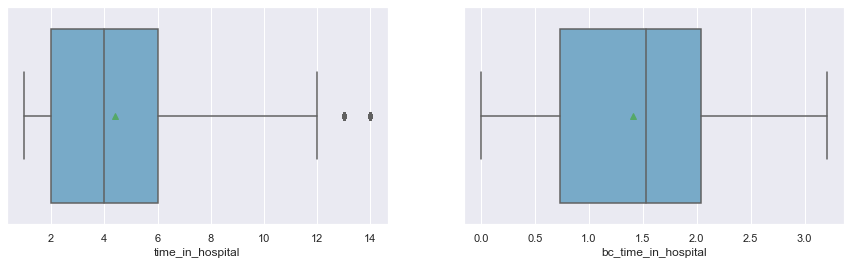

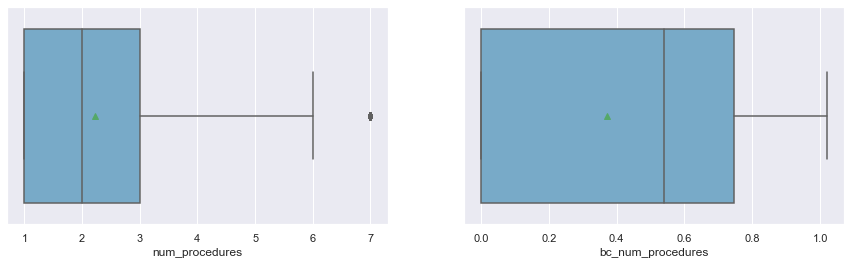

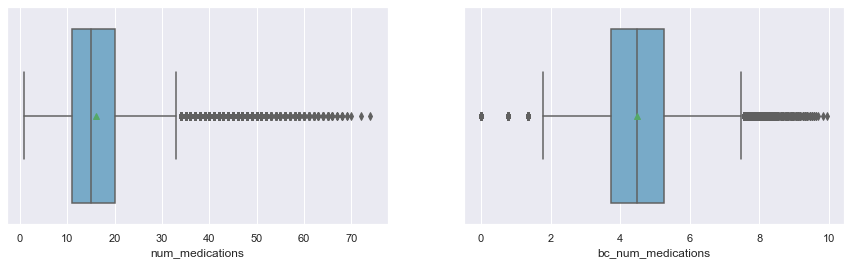

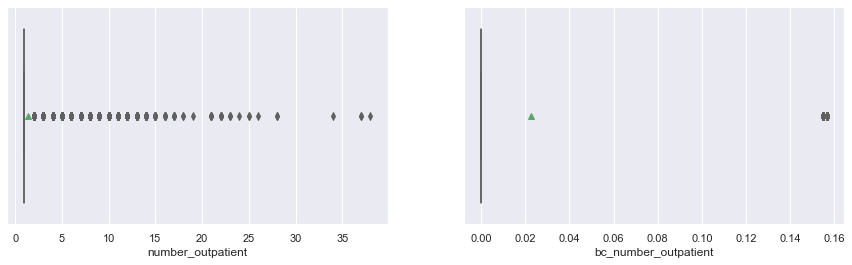

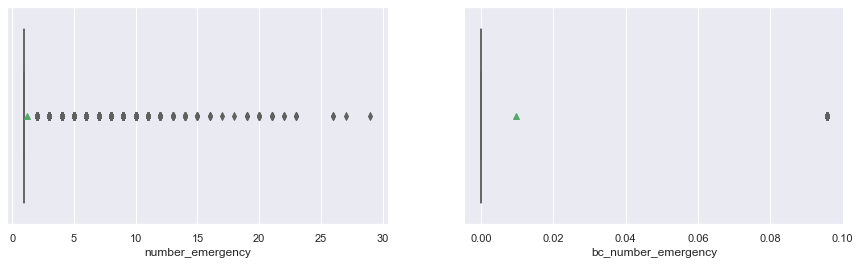

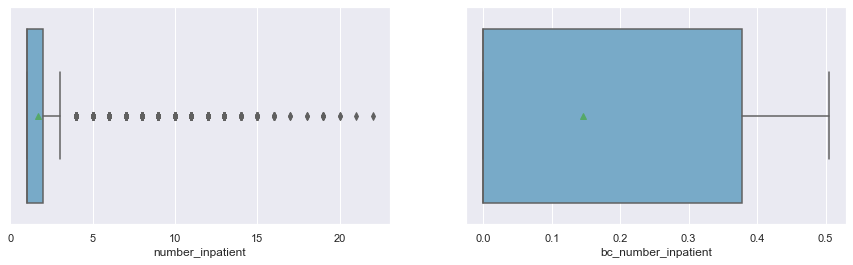

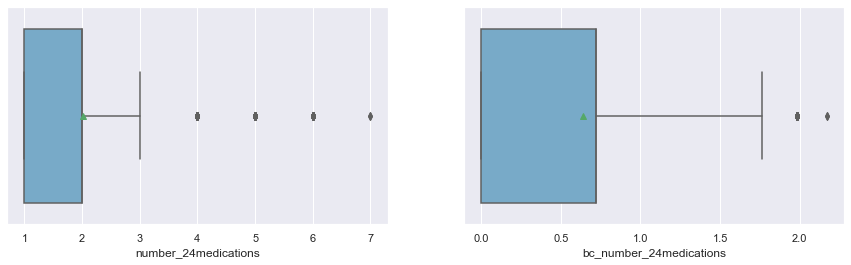

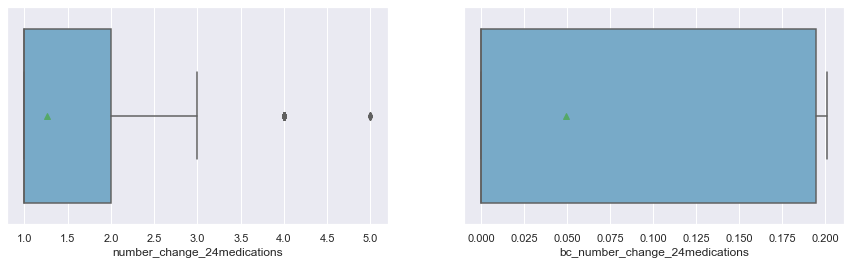

In [80]:
for i in right_skewed:
    fig, axes = plt.subplots(1,2,figsize = (15,4))
  
    sns.boxplot(i, data=X_train_2, palette='Blues', showmeans=True,ax=axes[0])
     
    sns.boxplot('bc_'+i, data=X_train_2, palette='Blues', showmeans=True,ax=axes[1])

In [81]:
len(X_train_2[X_train_2['bc_number_outpatient']>0.08])

10573

In [82]:
len(X_train_2[X_train_2['bc_number_emergency']>0.08])

7393

In [83]:
len(X_train_2[X_train_2['bc_number_change_24medications']>0.175])

18256

In [84]:
def skewness_compare(data,col):
    print(col+':',data[col].skew(),'bc_'+col+':',data['bc_'+col].skew())
    

In [85]:
for i in right_skewed:
    skewness_compare(X_train_2,i)

time_in_hospital: 1.11838998356612 bc_time_in_hospital: -0.024387656006650223
num_procedures: 1.424109074205191 bc_num_procedures: 0.2674890425197619
num_medications: 1.2668405293774294 bc_num_medications: 0.030600925876934384
number_outpatient: 8.146769485173431 bc_number_outpatient: 2.0040846827092214
number_emergency: 10.477636744467612 bc_number_emergency: 2.627265436447476
number_inpatient: 3.640111950508941 bc_number_inpatient: 0.702168356333793
number_24medications: 0.8507608831671558 bc_number_24medications: -0.012913570661586443
number_change_24medications: 1.4830550986139337 bc_number_change_24medications: 1.1409306052875035


In [86]:
for i in right_skewed:
    boxcox(i, X_test_2)

In [87]:
for i in right_skewed:
    del X_train_2[i]
    del X_test_2[i]

In [88]:
for i in X_train_2.columns:
    if len(X_train_2[i].unique())==1:
        print(i)
        del X_train_2[i]
        del X_test_2[i]

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_2)

# normalize
X_train_3  = scaler.transform(X_train_2)
X_test_3 = scaler.transform(X_test_2)

In [90]:
X_train_3.shape,X_test_3.shape

((72366, 89), (50883, 89))

In [91]:
### normalize+remove low-variance features
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.985 * (1 - .985)))
sel.fit(X_train_3)
X_train_4 = sel.transform(X_train_3)
X_test_4 = sel.transform(X_test_3)

In [92]:
X_train_4.shape,X_test_4.shape

((72366, 71), (50883, 71))

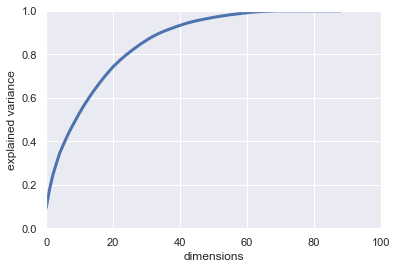

In [93]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_3)
cumsum = np.cumsum(pca.explained_variance_ratio_)
# Plot the explained variance vs number of dimensions
plt.figure(figsize = (6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 100, 0, 1])
plt.xlabel("dimensions")
plt.ylabel("explained variance")
plt.grid(True)
plt.show()

In [94]:
# pca after normalize
pca = PCA(n_components=0.95).fit(X_train_3)

X_train_pca = pca.transform(X_train_3)
X_test_pca = pca.transform(X_test_3)

In [95]:
X_train_pca.shape,X_test_pca.shape

((72366, 45), (50883, 45))

In [96]:
X_train_pca = pd.DataFrame(X_train_pca)

<AxesSubplot:xlabel='0', ylabel='1'>

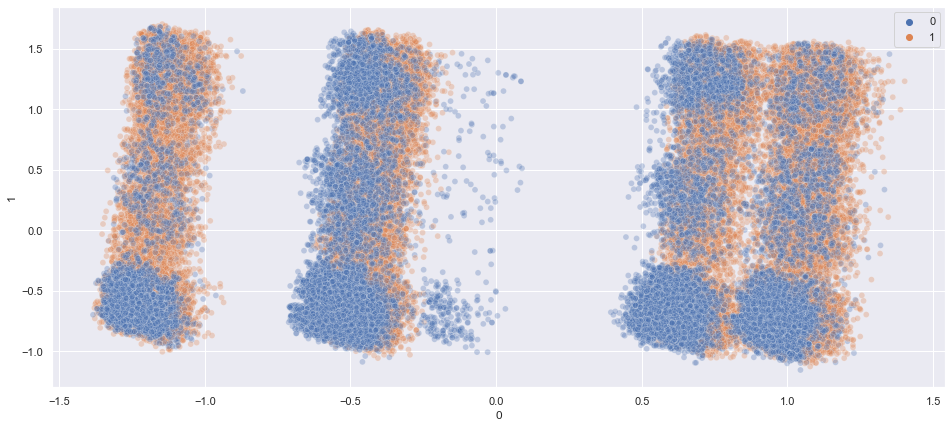

In [97]:
plt.figure(figsize=(16,7))
plt.subplot()
sns.scatterplot(
    x=X_train_pca[0], y=X_train_pca[1],
    alpha=0.3,hue = np.ravel(SMOTE_y)
)

# Logit regression

In [98]:
def lr(X_train, y_train, X_test, y_test):
    clf = LogisticRegression(random_state=41,penalty='l1',solver='saga').fit(X_train, y_train)
    clf_train_acc = clf.score(X_train, y_train).round(4)
    clf_test_acc = clf.score(X_test, y_test).round(4)
    y_pred = clf.predict(X_test)
    clf_test_precision = metrics.precision_score(y_test, y_pred).round(4)
    clf_test_recall = metrics.recall_score(y_test, y_pred).round(4)
    clf_test_F1 = metrics.f1_score(y_test, y_pred).round(4)
    print('training accuracy: ', clf_train_acc)
    scores = [clf_test_acc,clf_test_precision,clf_test_recall,clf_test_F1]
    return scores

In [99]:
### normalize only
from sklearn.linear_model import LogisticRegression

lr_3_scores = lr(X_train_3,SMOTE_y,X_test_3,y_test_1)
print('test scores:',lr_3_scores)

training accuracy:  0.7822
test scores: [0.8519, 0.8914, 0.9488, 0.9192]


In [100]:
### normalize+remove low-variance features
lr_4_scores = lr(X_train_4,SMOTE_y,X_test_4,y_test_1)
print('test scores:',lr_4_scores)

training accuracy:  0.7818
test scores: [0.8529, 0.8913, 0.9502, 0.9198]


In [101]:
# pca after normalize
lr_pca_scores = lr(X_train_pca,SMOTE_y,X_test_pca,y_test_1)
print('test scores:',lr_pca_scores)

training accuracy:  0.7021
test scores: [0.7694, 0.8933, 0.8407, 0.8662]


In [102]:
lr_acc = [lr_3_scores[0],lr_4_scores[0],lr_pca_scores[0]]
lr_pre = [lr_3_scores[1],lr_4_scores[1],lr_pca_scores[1]]
lr_rec = [lr_3_scores[2],lr_4_scores[2],lr_pca_scores[2]]
lr_f1 = [lr_3_scores[3],lr_4_scores[3],lr_pca_scores[3]]


# Random Forest

In [103]:
from sklearn.ensemble import  RandomForestClassifier

In [104]:
# tuning_parameters = {
#     'min_samples_leaf': np.arange(1, X_train_4.shape[1], 20),
#     'max_depth': np.arange(1, X_train_4.shape[1], 20),
#     'min_samples_split': np.arange(2, X_train_4.shape[1], 20)
# }

# test_accuracy=[]

# for i in tuning_parameters['min_samples_leaf']:
#     test_acc = []
#     for j in tuning_parameters['max_depth']:
#         for k in tuning_parameters['min_samples_split']:
#             model = RandomForestClassifier(n_estimators = 100,min_samples_leaf=i,max_depth=j,
#                                            min_samples_split=k, random_state = 41)
#             model.fit(X_train_4, SMOTE_y)
#             test = model.score(X_test_4, y_test_1).round(4)
#             test_acc.append(test)
#     test_accuracy.append(test_acc)
#     print('test accuracy for min_samples_leaf = '+str(i),'\n',test_acc)

In [105]:
# tuning_parameters = {
#     'max_depth': np.arange(1, X_train_4.shape[1], 10),
#     'min_samples_split': np.arange(2, X_train_4.shape[1], 10)
# }

# test_accuracy=[]
# for i in tuning_parameters['min_samples_split']:
#     test_acc = []
#     for j in tuning_parameters['max_depth']:
#         model = RandomForestClassifier(n_estimators = 100,min_samples_leaf=1,max_depth=j,
#                                            min_samples_split=i, random_state = 41)
#         model.fit(X_train_4, SMOTE_y)
#         test = model.score(X_test_4, y_test_1)
#         test_acc.append(test)
#     test_accuracy.append(test_acc)
#     print('test accuracy for min_samples_split = '+str(i),'\n',test_acc)


In [106]:
# tuning_parameters = {
#     'max_depth': np.arange(1, X_train_3.shape[1], 5)
# }

# test_accuracy_3=[]
# for i in tuning_parameters['max_depth']:
#     model = RandomForestClassifier(n_estimators = 100,min_samples_leaf=1,
#                                            max_depth=i, random_state = 41)
#     model.fit(X_train_3, SMOTE_y)
#     test = model.score(X_test_3, y_test_1)
#     test_accuracy_3.append(test.round(4))
# print('test accuracy for max_depth search: ',test_accuracy_3)

In [107]:
# tuning_parameters = {
#     'max_depth': np.arange(1, X_train_4.shape[1], 5)
# }

# test_accuracy_4=[]
# for i in tuning_parameters['max_depth']:
#     model = RandomForestClassifier(n_estimators = 100,min_samples_leaf=1,
#                                            max_depth=i, random_state = 41)
#     model.fit(X_train_4, SMOTE_y)
#     test = model.score(X_test_4, y_test_1)
#     test_accuracy_4.append(test.round(4))
# print('test accuracy for max_depth search: ',test_accuracy_4)

In [108]:
# tuning_parameters = {
#     'max_depth': np.arange(1, X_train_pca.shape[1], 5)
# }

# test_accuracy_pca=[]
# for i in tuning_parameters['max_depth']:
#     model = RandomForestClassifier(n_estimators = 100,min_samples_leaf=1,
#                                            max_depth=i, random_state = 41)
#     model.fit(X_train_pca, SMOTE_y)
#     test = model.score(X_test_pca, y_test_1)
#     test_accuracy_pca.append(test.round(4))
# print('test accuracy for max_depth search: ',test_accuracy_pca)

In [109]:
def rf(X_train, y_train, X_test, y_test):
    clf = RandomForestClassifier(n_estimators = 100,min_samples_leaf=1,
                                 max_depth=1, random_state = 41).fit(X_train, y_train)
    clf_train_acc = clf.score(X_train, y_train)
    clf_test_acc = clf.score(X_test, y_test).round(4)
    y_pred = clf.predict(X_test)
    clf_test_precision = metrics.precision_score(y_test, y_pred).round(4)
    clf_test_recall = metrics.recall_score(y_test, y_pred).round(4)
    clf_test_F1 = metrics.f1_score(y_test, y_pred).round(4)
    print('training accuracy: ', clf_train_acc.round(4))
    scores = [clf_test_acc,clf_test_precision,clf_test_recall,clf_test_F1]
    return scores

In [110]:
### normalize only
rf_3_scores = rf(X_train_3,SMOTE_y,X_test_3,y_test_1)
print('test scores:',rf_3_scores)

training accuracy:  0.625
test scores: [0.8879, 0.8879, 1.0, 0.9406]


In [111]:
### normalize+remove low-variance features
rf_4_scores = rf(X_train_4,SMOTE_y,X_test_4,y_test_1)
print('test scores:',rf_4_scores)

training accuracy:  0.625
test scores: [0.8879, 0.8879, 1.0, 0.9406]


In [112]:
# pca after normalize
rf_pca_scores = rf(X_train_pca,SMOTE_y,X_test_pca,y_test_1)
print('test scores:',rf_pca_scores)

training accuracy:  0.625
test scores: [0.8879, 0.8879, 1.0, 0.9406]


In [113]:
rf_acc = [rf_3_scores[0],rf_4_scores[0],rf_pca_scores[0]]
rf_pre = [rf_3_scores[1],rf_4_scores[1],rf_pca_scores[1]]
rf_rec = [rf_3_scores[2],rf_4_scores[2],rf_pca_scores[2]]
rf_f1 = [rf_3_scores[3],rf_4_scores[3],rf_pca_scores[3]]

# Naive Bayes

In [114]:
from sklearn import naive_bayes

def passNB(X_train, y_train, X_test, y_test):
    nb = naive_bayes.MultinomialNB(alpha=1, fit_prior=True, class_prior=None).fit(X_train, y_train)
    
    acc_train = nb.score(X_train, y_train)
    acc_test = nb.score(X_test, y_test).round(4)
    y_pred = nb.predict(X_test)
    precision_test = metrics.precision_score(y_test, y_pred).round(4)
    recall_test = metrics.recall_score(y_test, y_pred).round(4)
    F1_test = metrics.f1_score(y_test, y_pred).round(4)
    print('training accuracy: ', acc_train.round(4))
    scores = [acc_test, precision_test, recall_test, F1_test]
    return scores

# normalize only
nb_3_scores = passNB(X_train_3, SMOTE_y, X_test_3, y_test_1)
print('test scores:',nb_3_scores)

# normalize+remove low-variance features
nb_4_scores = passNB(X_train_4, SMOTE_y, X_test_4, y_test_1)
print('test scores:',nb_4_scores)

# pca after normalize, then nomolized to fit Multinomial NB
# Otherwise will get "ValueError: Negative values in data passed to MultinomialNB (input X)"
nb_pca_scores = passNB(MinMaxScaler().fit_transform(X_train_pca), SMOTE_y, MinMaxScaler().fit_transform(X_test_pca), y_test_1)
print('test scores:',nb_pca_scores)

nb_acc = []
nb_pre = []
nb_rec = []
nb_f1 = []

nb_scores = [nb_acc, nb_pre, nb_rec, nb_f1]

for scoreRow in nb_scores:
    scoreRow.append(nb_3_scores[nb_scores.index(scoreRow)])
    scoreRow.append(nb_4_scores[nb_scores.index(scoreRow)])
    scoreRow.append(nb_pca_scores[nb_scores.index(scoreRow)])
    print(scoreRow)


training accuracy:  0.6993
test scores: [0.7367, 0.8935, 0.7987, 0.8435]
training accuracy:  0.6926
test scores: [0.7418, 0.8931, 0.8056, 0.8471]
training accuracy:  0.625
test scores: [0.8879, 0.8879, 1.0, 0.9406]
[0.7367, 0.7418, 0.8879]
[0.8935, 0.8931, 0.8879]
[0.7987, 0.8056, 1.0]
[0.8435, 0.8471, 0.9406]


# ANN

In [115]:
num_features = X_train_pca.shape[1]
num_classes = 2
n_hidden_1 = 10

In [116]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

ModuleNotFoundError: No module named 'torch'

In [ ]:
x_data = np.array(X_train_pca)
x_data_torch = torch.from_numpy(x_data).float() 
y_data = np.array(SMOTE_y)
y_data_torch = torch.from_numpy(y_data)

x_test = np.array(X_test_pca)
x_test_torch = torch.from_numpy(x_test).float() 
y_test = np.array(y_test_1)
y_test_torch = torch.from_numpy(y_test)

In [ ]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        z1 = self.linear1(x)
        Zout = self.linear2(F.relu(z1))
        return Zout


start = time.time()
model = Model(num_features, n_hidden_1, num_classes)

learning_rate=0.01
no_of_epochs = 1000


criterion = nn.CrossEntropyLoss() 
optimiser = optim.Adam(model.parameters(), lr=learning_rate)

from sklearn.metrics import accuracy_score

for epoch in range(no_of_epochs):  

    inputs = x_data_torch
    labels = y_data_torch

    model.train()
    optimiser.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, labels) 
    loss.backward()
    optimiser.step()

    if epoch % 200 == 199:    
        model.eval()
        pred_outputs = model(inputs)
        predicted = torch.argmax(pred_outputs, 1)
        train_acc = accuracy_score(predicted.numpy(),y_data)
        print('%d, loss: %.4f, train_acc: %.4f' %(epoch + 1, loss.item(), train_acc))

print('Finished Training')
pred_outputs = model(x_test_torch)
_, predicted = torch.max(pred_outputs, 1)
# print('Predicted :', predicted.numpy())
# print('Truth :', y_data)

train_acc = accuracy_score(predicted.numpy(),y_test_torch)
print('Test Accuracy : %.2f' %train_acc)
end = time.time()
use_time = end- start
print("all done at %.2f seconds" %use_time)

200, loss: 0.5126, train_acc: 0.7529
400, loss: 0.4560, train_acc: 0.7884
600, loss: 0.4458, train_acc: 0.7940
800, loss: 0.4425, train_acc: 0.7961
1000, loss: 0.4405, train_acc: 0.7973
Finished Training
Test Accuracy : 0.74
all done at 17.91 seconds


In [ ]:
# accuracy: (tp + tn) / (p + n)
ann_accuracy = metrics.accuracy_score(predicted.numpy(),y_test_torch)
print('Accuracy: %f' % ann_accuracy)
# precision tp / (tp + fp)
ann_precision = metrics.precision_score(predicted.numpy(),y_test_torch)
print('Precision: %f' % ann_precision)
# recall: tp / (tp + fn)
ann_recall = metrics.recall_score(predicted.numpy(),y_test_torch)
print('Recall: %f' % ann_recall)
# f1: 2 tp / (2 tp + fp + fn)
ann_f1 = metrics.f1_score(predicted.numpy(),y_test_torch)
print('F1 score: %f' % ann_f1)

Accuracy: 0.744964
Precision: 0.807039
Recall: 0.895410
F1 score: 0.848931


In [127]:
ann_acc = [0.8612, 0.8503, 0.8548]
ann_pre = [0.9616, 0.9471, 0.9554]
ann_rec = [0.8907, 0.8912, 0.8893]
ann_f1 = [0.9248, 0.9183, 0.9212]

#  GradientBoostingClassifier

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
train_list_name = ['X_train_3', 'X_train_4', 'X_train_pca']
train_list = [X_train_3, X_train_4, X_train_pca]
test_list = [X_test_3, X_test_4, X_test_pca]

In [119]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=1, random_state=41)
clf.fit(X_train_3, SMOTE_y)
y_predicted = clf.predict(X_test_3)
accuracy = metrics.accuracy_score(y_test_1, y_predicted)
print(round(accuracy,4))

0.8879


Text(0.5, 1.0, 'Feature Importance (MDI)')

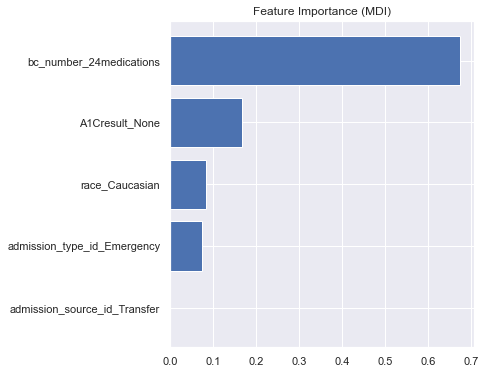

In [120]:
feature_importance = clf.feature_importances_
# print(feature_importance)
# sorted_idx = np.argsort(feature_importance)
# print(sorted_idx)
ten_importance_sorted_idx = np.argsort(feature_importance)[-5:]
# print(ten_importance_sorted_idx)
pos = np.arange(ten_importance_sorted_idx.shape[0]) + .5
# print(pos)
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[ten_importance_sorted_idx], align='center')
plt.yticks(pos, np.array(X_train_2.columns)[ten_importance_sorted_idx])
plt.title('Feature Importance (MDI)')

In [121]:
gb_acc = []
gb_pre = []
gb_rec = []
gb_f1 = []

for i, j, k in zip(train_list, test_list, train_list_name):
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=1, random_state=41)
    clf.fit(i, SMOTE_y)
    y_predicted = clf.predict(j)
    # accuracy: (tp + tn) / (p + n)
    accuracy = metrics.accuracy_score(y_test_1, y_predicted)
    gb_acc.append(round(accuracy,4))
    # precision tp / (tp + fp)
    precision = metrics.precision_score(y_test_1, y_predicted)
    gb_pre.append(round(precision,4))
    # recall: tp / (tp + fn)
    recall = metrics.recall_score(y_test_1, y_predicted)
    gb_rec.append(round(recall,4))
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = metrics.f1_score(y_test_1, y_predicted)
    gb_f1.append(round(f1,4))

print("gb_acc: ", gb_acc)
print("gb_pre: ", gb_pre)
print("gb_rec: ", gb_rec)
print("gb_f1:  ", gb_f1)

gb_acc:  [0.8879, 0.8879, 0.8879]
gb_pre:  [0.8879, 0.8879, 0.8879]
gb_rec:  [1.0, 1.0, 1.0]
gb_f1:   [0.9406, 0.9406, 0.9406]


# CNN

In [122]:
X_train_3.shape

(72366, 89)

In [123]:
input_feature = X_train_4.shape[1]

X_train_pca_array = np.array(X_train_4)
X_test_pca_array = np.array(X_test_4)

In [124]:
X_train_5 = X_train_pca_array.reshape(72366, input_feature,1)
X_test_5 = X_test_pca_array.reshape(50883,input_feature,1)

In [125]:
SMOTE_y_array=np.array(SMOTE_y)
y_test_1_array = np.array(y_test_1)

In [126]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import tensorflow.keras as keras

model = keras.Sequential()
 
model.add(Conv1D(32, 3, activation='relu', padding = 'same', input_shape = (input_feature,1)))
model.add(MaxPooling1D())
# model.add(Conv1D(64, 3, activation='relu', padding = 'same'))
# model.add(MaxPooling1D())
# model.add(Conv1D(128, 3, activation='relu', padding = 'same'))
# model.add(MaxPooling1D())
          
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 71, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 35, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1120)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                35872     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 36,033
Trainable params: 36,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
epoch_num = 5
history = model.fit(X_train_5, SMOTE_y_array, 
              epochs=epoch_num,
              validation_data = (X_test_5, y_test_1_array))

Epoch 1/5
2262/2262 [==============================] - 7s 3ms/step - loss: 0.5319 - accuracy: 0.7386 - val_loss: 0.4238 - val_accuracy: 0.8504
Epoch 2/5
2262/2262 [==============================] - 6s 3ms/step - loss: 0.4839 - accuracy: 0.7727 - val_loss: 0.4623 - val_accuracy: 0.8085
Epoch 3/5
2262/2262 [==============================] - 8s 4ms/step - loss: 0.4782 - accuracy: 0.7753 - val_loss: 0.4046 - val_accuracy: 0.8700
Epoch 4/5
2262/2262 [==============================] - 7s 3ms/step - loss: 0.4755 - accuracy: 0.7770 - val_loss: 0.4187 - val_accuracy: 0.8531
Epoch 5/5
2262/2262 [==============================] - 7s 3ms/step - loss: 0.4721 - accuracy: 0.7787 - val_loss: 0.4282 - val_accuracy: 0.8497


Text(0, 0.5, 'Accuracy')

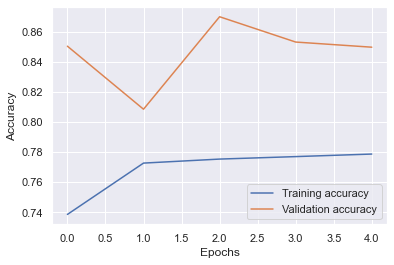

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

epochs = [i for i in range(epoch_num)]

plt.plot(epochs, history.history['accuracy'], label = 'Training accuracy')

plt.plot(epochs, history.history['val_accuracy'], label = 'Validation accuracy')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
# yhat_probs = model.predict(X_test_5, verbose=0)
# yhat_classes = model.predict_classes(X_test_5, verbose=0)

In [ ]:
# yhat_probs = yhat_probs[:, 0]
# yhat_classes = yhat_classes[:, 0]

In [ ]:
# # accuracy: (tp + tn) / (p + n)
# accuracy = metrics.accuracy_score(y_test_1, yhat_classes)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = metrics.precision_score(y_test_1, yhat_classes)
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = metrics.recall_score(y_test_1, yhat_classes)
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = metrics.f1_score(y_test_1, yhat_classes)
# print('F1 score: %f' % f1)

In [128]:
cnn_acc = [0.8468, 0.8797, 0.8156]
cnn_pre = [0.8912, 0.8888, 0.8912]
cnn_rec = [0.9425, 0.9882, 0.9025]
cnn_f1 = [0.9161, 0.9359, 0.8968]

# Voting Ensemble

In [133]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

# Currently consists of Logistic Regression, Random Forest, Multinominal Naive Bayes

def voting(X_train, y_train, X_test, y_test):
    lr = LogisticRegression(random_state=41,penalty='l1',solver='saga').fit(X_train, y_train)
    rf = RandomForestClassifier(n_estimators = 100,min_samples_leaf=1,
                                 max_depth=1, random_state = 41).fit(X_train, y_train)
    # nb = naive_bayes.MultinomialNB(alpha=1, fit_prior=True, class_prior=None)\
    #                         .fit(X_train, y_train)
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=1, random_state=41)

    ve = VotingClassifier(
        estimators=[('lr', lr), ('rf', rf), ('gb', gb)],
        voting='soft', weights=[2, 2, 2]
    )

    params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}
    grid_search = GridSearchCV(estimator = ve,
                                param_grid=params,
                                scoring = "recall",
                                n_jobs = 8,
                                verbose = 5)
    grid_search.fit(X_train, y_train)

    ve_train_acc = grid_search.score(X_train, y_train).round(4)
    ve_test_acc = grid_search.score(X_test, y_test).round(4)
    y_pred = grid_search.predict(X_test)
    ve_test_precision = metrics.precision_score(y_test, y_pred).round(4)
    ve_test_recall = metrics.recall_score(y_test, y_pred).round(4)
    ve_test_F1 = metrics.f1_score(y_test, y_pred).round(4)
    print('training accuracy: ', ve_train_acc)
    scores = [ve_test_acc, ve_test_precision, ve_test_recall, ve_test_F1]
    return scores


# normalize only
ve_3_scores = voting(X_train_3, SMOTE_y, X_test_3, y_test_1)
print('test scores:', ve_3_scores)
# normalize+remove low-variance features
ve_4_scores = voting(X_train_4, SMOTE_y, X_test_4, y_test_1)
print('test scores:', ve_4_scores)
# pca after normalize, then nomolized to fit Multinomial NB
# ve_pca_scores = voting(MinMaxScaler().fit_transform(X_train_pca), SMOTE_y, MinMaxScaler().fit_transform(X_test_pca), y_test_1)
ve_pca_scores = voting(X_train_pca, SMOTE_y, X_test_pca, y_test_1)
print('test scores:', ve_pca_scores)

ve_acc = []
ve_pre = []
ve_rec = []
ve_f1 = []
ve_scores = [ve_acc, ve_pre, ve_rec, ve_f1]

for scoreRow in ve_scores:
    scoreRow.append(ve_3_scores[ve_scores.index(scoreRow)])
    scoreRow.append(ve_4_scores[ve_scores.index(scoreRow)])
    scoreRow.append(ve_pca_scores[ve_scores.index(scoreRow)])
    print(scoreRow)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
training accuracy:  0.9865
test scores: [0.9966, 0.8883, 0.9966, 0.9393]
Fitting 5 folds for each of 4 candidates, totalling 20 fits
training accuracy:  0.9864
test scores: [0.9965, 0.8883, 0.9965, 0.9393]
Fitting 5 folds for each of 4 candidates, totalling 20 fits
training accuracy:  0.9825
test scores: [0.9847, 0.8885, 0.9847, 0.9341]
[0.9966, 0.9965, 0.9847]
[0.8883, 0.8883, 0.8885]
[0.9966, 0.9965, 0.9847]
[0.9393, 0.9393, 0.9341]


In [ ]:
ve_acc = [0.9966, 0.9965, 0.9847]
ve_pre = [0.8883, 0.8883, 0.8885]
ve_rec = [0.9966, 0.9965, 0.9847]
ve_f1 = [0.9393, 0.9393, 0.9341]

# XGBoosting

In [ ]:
#import libraries
import pandas as pd
import xgboost as xgb
import numpy as np

#create xgboost matrices
Train = xgb.DMatrix(X_train_3, label = SMOTE_y)
Test = xgb.DMatrix(X_test_3, label = y_test_1)

#set the parameters
parameters1 = {'learning_rate': 0.5,
               'max_depth': 5,
               'colsample_bytree': 1,
               'subsample': 1,
               'min_child_weight': 2,
               'gamma': 1, 
               'random_state': 41,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

#run XGBoost
model1 = xgb.train(params = parameters1,
                   dtrain = Train,
                   num_boost_round = 200,
                   evals = [(Test, "Yes")],
                   verbose_eval = 30)


[0]	Yes-auc:0.53223
[30]	Yes-auc:0.56968
[60]	Yes-auc:0.56747
[90]	Yes-auc:0.56278
[120]	Yes-auc:0.56181
[150]	Yes-auc:0.55856
[180]	Yes-auc:0.55787
[199]	Yes-auc:0.55704


In [ ]:
#PRedictions
predictions1 = model1.predict(Test)
predictions1 = np.where(predictions1 > 0.5, 1, 0)

#Confusion MAtrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix1 = confusion_matrix(y_test_1, predictions1)
print(confusion_matrix1)
report1 = classification_report(y_test_1, predictions1)
print(report1)

[[  703  5000]
 [ 3744 41436]]
              precision    recall  f1-score   support

           0       0.16      0.12      0.14      5703
           1       0.89      0.92      0.90     45180

    accuracy                           0.83     50883
   macro avg       0.53      0.52      0.52     50883
weighted avg       0.81      0.83      0.82     50883



In [ ]:
#feature_coloumns
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
train_test_new.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in train_test_new.columns.values]
feature_columns = list(train_test_new.columns.values)
feature_columns

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'number_24medications',
 'number_change_24medications',
 'race_AfricanAmerican',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_Female',
 'gender_Male',
 'gender_Unknown/Invalid',
 'age__0-10)',
 'age__10-20)',
 'age__20-30)',
 'age__30-40)',
 'age__40-50)',
 'age__50-60)',
 'age__60-70)',
 'age__70-80)',
 'age__80-90)',
 'age__90-100)',
 'admission_type_id_Elective',
 'admission_type_id_Emergency',
 'admission_type_id_NULL',
 'admission_type_id_Newborn',
 'admission_type_id_Not Available',
 'admission_type_id_Not Mapped',
 'admission_type_id_Trauma Center',
 'admission_type_id_Urgent',
 'discharge_disposition_id_AMA',
 'discharge_disposition_id_Expired',
 'discharge_disposition_id_HHC',
 'discharge_disposition_id_NULL',
 'discharge_disposition_id_Not mapped',
 'discharge_disposition_id_Rout

In [ ]:
#create xgboost matrices part 2
Train = xgb.DMatrix(X_train_3, label = SMOTE_y, feature_names = feature_columns)
Test = xgb.DMatrix(X_test_3, label = y_test_1, feature_names = feature_columns)

In [ ]:
#set the parameters part 2
parameters2 = {'learning_rate': 0.05,
               'max_depth': 2,
               'colsample_bytree': 0.5,
               'subsample': 1,
               'min_child_weight': 1,
               'gamma': 0, 
               'random_state': 41,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

#run XGBoost
model2 = xgb.train(params = parameters2,
                   dtrain = Train,
                   num_boost_round = 200,
                   evals = [(Test, "Yes")],
                   verbose_eval = 50)

[0]	Yes-auc:0.52609
[50]	Yes-auc:0.54079
[100]	Yes-auc:0.54969
[150]	Yes-auc:0.55323
[199]	Yes-auc:0.55608


In [ ]:
#Predictions part 2
predictions2 = model2.predict(Test)
predictions2 = np.where(predictions2 > 0.5, 1, 0)

#Confusion Matrix
confusion_matrix2 = confusion_matrix(y_test_1, predictions2)
print(confusion_matrix2)
report2 = classification_report(y_test_1, predictions2)
print(report2)

[[  464  5239]
 [ 2225 42955]]
              precision    recall  f1-score   support

           0       0.17      0.08      0.11      5703
           1       0.89      0.95      0.92     45180

    accuracy                           0.85     50883
   macro avg       0.53      0.52      0.52     50883
weighted avg       0.81      0.85      0.83     50883



In [ ]:
#setting the cross validation parameters


# from sklearn.model_selection import KFold
# tune_control = KFold(n_splits = 5,
#                      shuffle = True,
#                      random_state = 41).split(X = X_train_3,
#                                                 y = SMOTE_y)

# #set parameter tuning
# #set the parameters part 2
# tune_grid = {'learning_rate': [0.05, 0.3],
#                'max_depth': range(2, 9, 2),
#                'colsample_bytree': [0.5, 1],
#                'subsample': [1],
#                'min_child_weight': [1],
#                'gamma': [0], 
#                'random_state': [41],
#                'n_estimators': range(200, 2000, 200),
#                'booster': ["gbtree"]}               

# from xgboost import XGBClassifier
# classifier = XGBClassifier(objective = "binary:logistic")

# #Cross Validation Assembly
# from sklearn.model_selection import GridSearchCV
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = tune_grid,
#                             scoring = "roc_auc",
#                             n_jobs = 6,
#                             cv = tune_control,
#                             verbose = 5)

# #Setting evaluation parameters
# evaluation_parameters = {"early_stopping_rounds": 100,
#                          "eval_metric": "auc",
#                          "eval_set": [(X_test_3, y_test_1)]}

# #Hyperparameter tuning and cross validation
# tune_model = grid_search.fit(X = X_train_3,
#                              y = SMOTE_y,
#                              **evaluation_parameters)
# grid_search.best_params_, grid_search.best_score_




# #output:({'booster': 'gbtree',
#   'colsample_bytree': 1,
#   'gamma': 0,
#   'learning_rate': 0.05,
#   'max_depth': 8,
#   'min_child_weight': 1,
#   'n_estimators': 200,
#   'random_state': 41,
#   'subsample': 1},
#  0.8774396058301308)

In [ ]:
#setting the cross validation parameters


# from sklearn.model_selection import KFold
# tune_control = KFold(n_splits = 5,
#                      shuffle = True,
#                      random_state = 41).split(X = X_train_3,
#                                                 y = SMOTE_y)

# #set parameter tuning part 2
# tune_grid2 = {'learning_rate': [0.05],
#                'max_depth': [8],
#                'colsample_bytree': [1],
#                'subsample': [0.9, 1],
#                'min_child_weight': range(1,5,1),
#                'gamma': [0, 0.1], 
#                'random_state': [41],
#                'n_estimators': range(200, 2000, 200),
#                'booster': ["gbtree"]}         

# #Cross Validation Assembly
# from sklearn.model_selection import GridSearchCV
# grid_search2 = GridSearchCV(estimator = classifier,
#                            param_grid = tune_grid2,
#                             scoring = "roc_auc",
#                             n_jobs = 6,
#                             cv = tune_control,
#                             verbose = 5)


# #Hyperparameter tuning and cross validation
# tune_model2 = grid_search2.fit(X = X_train_3,
#                              y = SMOTE_y,
#                              **evaluation_parameters)
# grid_search2.best_params_, grid_search2.best_score_




# output: ({'booster': 'gbtree',
#   'colsample_bytree': 1,
#   'gamma': 0,
#   'learning_rate': 0.05,
#   'max_depth': 8,
#   'min_child_weight': 3,
#   'n_estimators': 400,
#   'random_state': 41,
#   'subsample': 0.9},
#  0.8807858246028522)

In [ ]:
parameters3 = {'learning_rate': 0.05,
               'max_depth': 8,
               'colsample_bytree': 0.5,
               'subsample': 0.9,
               'min_child_weight': 3,
               'gamma': 0, 
               'random_state': 41,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

#run XGBoost part 3
model3 = xgb.train(params = parameters3,
                   dtrain = Train,
                   num_boost_round = 800,
                   evals = [(Test, "Yes")],
                   verbose_eval = 50)


#Predictions part 3
predictions3 = model3.predict(Test)
predictions3 = np.where(predictions3 > 0.5, 1, 0)

#Confusion Matrix
confusion_matrix3 = confusion_matrix(y_test_1, predictions3)
print(confusion_matrix3)
report3 = classification_report(y_test_1, predictions3)
print(report3)


[0]	Yes-auc:0.53591
[50]	Yes-auc:0.57163
[100]	Yes-auc:0.57651
[150]	Yes-auc:0.57755
[200]	Yes-auc:0.57789
[250]	Yes-auc:0.57371
[300]	Yes-auc:0.57329
[350]	Yes-auc:0.57430
[400]	Yes-auc:0.57396
[450]	Yes-auc:0.57403
[500]	Yes-auc:0.57364
[550]	Yes-auc:0.57352
[600]	Yes-auc:0.57332
[650]	Yes-auc:0.57265
[700]	Yes-auc:0.57332
[750]	Yes-auc:0.57410
[799]	Yes-auc:0.57495
[[  480  5223]
 [ 2471 42709]]
              precision    recall  f1-score   support

           0       0.16      0.08      0.11      5703
           1       0.89      0.95      0.92     45180

    accuracy                           0.85     50883
   macro avg       0.53      0.51      0.51     50883
weighted avg       0.81      0.85      0.83     50883



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

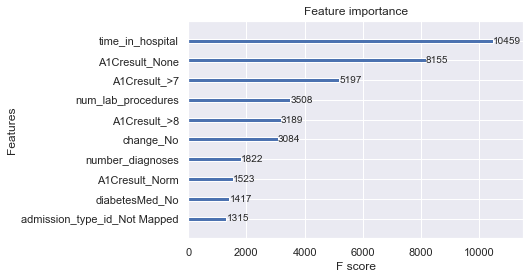

In [ ]:
#plot importances
xgb.plot_importance(model3, max_num_features = 10)

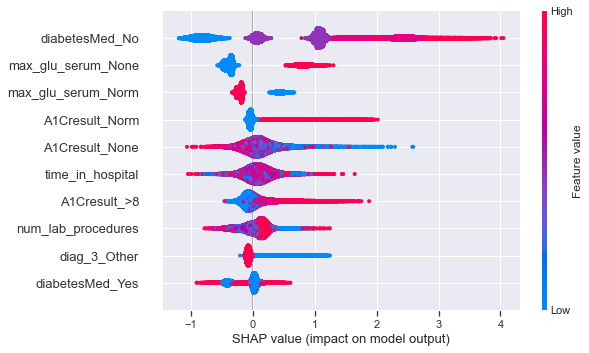

In [ ]:
import shap
explainer = shap.TreeExplainer(model3)
shap_values = explainer.shap_values(X_test_3)
#shap plotting
shap.summary_plot(shap_values,
                  X_test_3,
                  feature_names = feature_columns,
                  max_display = 10)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_1, predictions3)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_1, predictions3)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_1, predictions3)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_1,predictions3)
print('F1 score: %f' % f1)

Accuracy: 0.848790
Precision: 0.891033
Recall: 0.945308
F1 score: 0.917368


In [ ]:
#For Normalised + remove sparse features
#create xgboost matrices
Train2 = xgb.DMatrix(X_train_4, label = SMOTE_y)
Test2 = xgb.DMatrix(X_test_4, label = y_test_1)

#set the parameters
parameters4 = {'learning_rate': 0.05,
               'max_depth': 8,
               'colsample_bytree': 0.5,
               'subsample': 0.9,
               'min_child_weight': 3,
               'gamma': 0, 
               'random_state': 41,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

#run XGBoost
model4 = xgb.train(params = parameters4,
                   dtrain = Train2,
                   num_boost_round = 200,
                   evals = [(Test2, "Yes")],
                   verbose_eval = 30)

[0]	Yes-auc:0.53555
[30]	Yes-auc:0.55873
[60]	Yes-auc:0.56592
[90]	Yes-auc:0.56912
[120]	Yes-auc:0.57027
[150]	Yes-auc:0.57008
[180]	Yes-auc:0.56953
[199]	Yes-auc:0.56637


In [ ]:
#PRedictions
predictions4 = model4.predict(Test2)
predictions4 = np.where(predictions4 > 0.5, 1, 0)

#Confusion MAtrix
confusion_matrix4 = confusion_matrix(y_test_1, predictions4)
print(confusion_matrix4)
report4 = classification_report(y_test_1, predictions4)
print(report4)

[[  407  5296]
 [ 2288 42892]]
              precision    recall  f1-score   support

           0       0.15      0.07      0.10      5703
           1       0.89      0.95      0.92     45180

    accuracy                           0.85     50883
   macro avg       0.52      0.51      0.51     50883
weighted avg       0.81      0.85      0.83     50883



In [ ]:

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_1, predictions4)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_1, predictions4)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_1, predictions4)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_1,predictions4)
print('F1 score: %f' % f1)

Accuracy: 0.850952
Precision: 0.890097
Recall: 0.949358
F1 score: 0.918773


In [ ]:
#For Normalised+PCA
X_test_pca2 = np.asmatrix(X_test_pca)
X_train_pca2 = np.asmatrix(X_train_pca)
#create xgboost matrices
Train3 = xgb.DMatrix(X_train_pca2, label = SMOTE_y)
Test3 = xgb.DMatrix(X_test_pca2, label = y_test_1)



In [ ]:

#set the parameters
parameters5 = {'learning_rate': 0.05,
               'max_depth': 8,
               'colsample_bytree': 0.5,
               'subsample': 0.9,
               'min_child_weight': 3,
               'gamma': 0, 
               'random_state': 41,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

#run XGBoost
model5 = xgb.train(params = parameters5,
                   dtrain = Train3,
                   num_boost_round = 200,
                   evals = [(Test3, "Yes")],
                   verbose_eval = 30)

[0]	Yes-auc:0.52172
[30]	Yes-auc:0.54800
[60]	Yes-auc:0.55723
[90]	Yes-auc:0.56381
[120]	Yes-auc:0.56817
[150]	Yes-auc:0.57066
[180]	Yes-auc:0.57247
[199]	Yes-auc:0.57254


In [ ]:
#PRedictions
predictions5 = model5.predict(Test3)
predictions5 = np.where(predictions5 > 0.5, 1, 0)

#Confusion MAtrix
confusion_matrix5 = confusion_matrix(y_test_1, predictions5)
print(confusion_matrix5)
report5 = classification_report(y_test_1, predictions5)
print(report5)

[[  644  5059]
 [ 3919 41261]]
              precision    recall  f1-score   support

           0       0.14      0.11      0.13      5703
           1       0.89      0.91      0.90     45180

    accuracy                           0.82     50883
   macro avg       0.52      0.51      0.51     50883
weighted avg       0.81      0.82      0.81     50883



In [ ]:

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_1, predictions5)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_1, predictions5)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_1, predictions5)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_1,predictions5)
print('F1 score: %f' % f1)

Accuracy: 0.823556
Precision: 0.890782
Recall: 0.913258
F1 score: 0.901880


In [134]:
xgb_acc = [0.848790,0.850952, 0.823556]
xgb_pre = [0.891033,0.890097, 0.890782]
xgb_rec = [0.945308,0.949358, 0.913258]
xgb_f1 = [0.917368,0.918773, 0.901880]

# Other models...

# Evaluation

In [135]:
test_acc={'Multinomial Naive Bayes': nb_acc,
            'Logistic Regression': lr_acc,
            'Random Forest': rf_acc,
            'ANN': ann_acc,
            'CNN': cnn_acc,
            'GB': gb_acc,
            'Voting': ve_acc,
            'XGB':xgb_acc}
test_acc_table  = pd.DataFrame(test_acc).T
test_acc_table.columns = ['Normalised only','Normalised + remove sparse features','Normalised+PCA']
print("Accuracy")
display(test_acc_table)

Accuracy


,Normalised only,Normalised + remove sparse features,Normalised+PCA
Multinomial Naive Bayes,0.73670,0.741800,0.887900
Logistic Regression,0.85190,0.852900,0.769400
Random Forest,0.88790,0.887900,0.887900
ANN,0.86120,0.850300,0.854800
CNN,0.84680,0.879700,0.815600
GB,0.88790,0.887900,0.887900
Voting,0.99660,0.996500,0.984700
XGB,0.84879,0.850952,0.823556


In [136]:
test_pre={'Multinomial Naive Bayes': nb_pre,
            'Logistic Regression': lr_pre,
            'Random Forest': rf_pre,
            'ANN': ann_pre,
            'CNN': cnn_pre,
            'GB': gb_pre,
            'Voting': ve_pre,
            'XGB':xgb_pre}
test_pre_table  = pd.DataFrame(test_pre).T
test_pre_table.columns = ['Normalised only','Normalised + remove sparse features','Normalised+PCA']
print("Precision")
display(test_pre_table)

Precision


,Normalised only,Normalised + remove sparse features,Normalised+PCA
Multinomial Naive Bayes,0.893500,0.893100,0.887900
Logistic Regression,0.891400,0.891300,0.893300
Random Forest,0.887900,0.887900,0.887900
ANN,0.961600,0.947100,0.955400
CNN,0.891200,0.888800,0.891200
GB,0.887900,0.887900,0.887900
Voting,0.888300,0.888300,0.888500
XGB,0.891033,0.890097,0.890782


In [137]:
test_rec={'Multinomial Naive Bayes': nb_rec,
            'Logistic Regression': lr_rec,
            'Random Forest': rf_rec,
            'ANN': ann_rec,
            'CNN': cnn_rec,
            'GB': gb_rec,
            'Voting': ve_rec,
            'XGB':xgb_rec}
test_rec_table  = pd.DataFrame(test_rec).T
test_rec_table.columns = ['Normalised only','Normalised + remove sparse features','Normalised+PCA']
print("Recall")
display(test_rec_table)

Recall


,Normalised only,Normalised + remove sparse features,Normalised+PCA
Multinomial Naive Bayes,0.798700,0.805600,1.000000
Logistic Regression,0.948800,0.950200,0.840700
Random Forest,1.000000,1.000000,1.000000
ANN,0.890700,0.891200,0.889300
CNN,0.942500,0.988200,0.902500
GB,1.000000,1.000000,1.000000
Voting,0.996600,0.996500,0.984700
XGB,0.945308,0.949358,0.913258


In [138]:
test_f1={'Multinomial Naive Bayes': nb_f1,
            'Logistic Regression': lr_f1,
            'Random Forest': rf_f1,
            'ANN': ann_f1,
            'CNN': cnn_f1,
            'GB': gb_f1,
            'Voting': ve_f1,
            'XGB':xgb_f1}
test_f1_table  = pd.DataFrame(test_f1).T
test_f1_table.columns = ['Normalised only','Normalised + remove sparse features','Normalised+PCA']
print("F1")
display(test_f1_table)

F1


,Normalised only,Normalised + remove sparse features,Normalised+PCA
Multinomial Naive Bayes,0.843500,0.847100,0.94060
Logistic Regression,0.919200,0.919800,0.86620
Random Forest,0.940600,0.940600,0.94060
ANN,0.924800,0.918300,0.92120
CNN,0.916100,0.935900,0.89680
GB,0.940600,0.940600,0.94060
Voting,0.939300,0.939300,0.93410
XGB,0.917368,0.918773,0.90188
